In [1]:
# import packages
import h5py # read h5

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib import rc
from cycler import cycler

import numpy as np
import pandas as pd


# download and install Dr. Jin's python package, click the url below for more details
# !git clone https://github.com/jinwar/jin_pylib

from jin_pylib import gjsignal
from jin_pylib import Data2D_XT


# Waterfall plot

In [2]:
# Figure format
rc = {'axes.facecolor':'white',
      'figure.figsize': (12, 6),
      'savefig.dpi': 600,
#       'axes.grid' : False,
      'axes.edgecolor' : '0.15',
      'font.family':'Times New Roman',
      'axes.labelsize': 20,         # X、Y 轴标题字体
      'axes.labelweight': 'bold',   # X、Y 轴标题加粗
      'xtick.labelsize': 20,        # X轴刻度文字
      'ytick.labelsize': 20,        # Y轴刻度文字
      'legend.fontsize': 20,       # 图例字体

      # 线宽与颜色顺序
      'lines.linewidth': 2.25,      # 所有线条默认 2.25 pt
      'axes.prop_cycle': cycler('color', list(('k', 'r', 'b', 'g', 'm', 'c', 'y'))),

      # 刻度朝外 & 粗细
      'xtick.direction': 'out',
      'ytick.direction': 'out',
      'xtick.major.size': 6,
      'ytick.major.size': 6,
      'xtick.major.width': 2.0,
      'ytick.major.width': 2.0,

      # 坐标轴（内框）线宽
      'axes.linewidth': 2.0,
      } 
# lack of font size
plt.rcParams.update(rc)

In [3]:
# Read h5 files
f1 = h5py.File('C:/Users/fengxiang.mao/Desktop/Devon data/HFTS-1_Devon/20220707/Evo 5 (POP)/Zgabay A14H - pop - strain change.h5','r')
print(list(f1.keys()))

['data', 'depth', 'stamps', 'stamps_unix']


In [4]:
# Assign variables
dstrain = (f1['data'])
dstrain = np.array(dstrain)
print(dstrain.shape)

depth = (f1['depth'])

date_plot = (f1['stamps'])
date_plot = np.array(date_plot)

(7008, 57218)


In [5]:
#depth 和相邻depth的差值
print(np.diff(depth))
average_diff = np.mean(np.diff(depth))
print(average_diff)


[0.33188438 0.3286078  0.33188438 ... 0.33203125 0.32617188 0.328125  ]
0.32975233


In [6]:
# use panda package
print(pd.DataFrame(depth))
print(pd.DataFrame(date_plot))

                  0
0          0.097321
1          0.429206
2          0.757813
3          1.089698
4          1.418306
...             ...
57213  18866.220703
57214  18866.550781
57215  18866.882812
57216  18867.208984
57217  18867.537109

[57218 rows x 1 columns]
                                  0
0     b'03/14/2022 20:56:49.350706'
1     b'03/14/2022 20:58:13.618471'
2     b'03/14/2022 20:59:38.346233'
3     b'03/14/2022 21:01:02.745833'
4     b'03/14/2022 21:02:27.442383'
...                             ...
7003  b'03/21/2022 18:08:26.564440'
7004  b'03/21/2022 18:09:51.421313'
7005  b'03/21/2022 18:11:16.399100'
7006  b'03/21/2022 18:12:41.365719'
7007  b'03/21/2022 18:14:06.359133'

[7008 rows x 1 columns]


In [7]:
date_plot

array([b'03/14/2022 20:56:49.350706', b'03/14/2022 20:58:13.618471',
       b'03/14/2022 20:59:38.346233', ..., b'03/21/2022 18:11:16.399100',
       b'03/21/2022 18:12:41.365719', b'03/21/2022 18:14:06.359133'],
      dtype='|S26')

In [8]:
s0 = date_plot[0]
xstartdate = datetime.datetime.strptime(s0.decode('utf-8'), "%m/%d/%Y %H:%M:%S.%f")
print(xstartdate)

2022-03-14 20:56:49.350706


In [9]:
# construct time array
startDate = datetime.datetime(2022,3,14,20,56,49,350706)

t_intrvl = 85 # time interval in seconds   
t = 1 + t_intrvl * np.arange(len(date_plot))        # array([1, 146, 291, ...])
t = t.tolist()

print(startDate)

2022-03-14 20:56:49.350706


In [11]:
data = dstrain;

# creating a Data2D class instance

DASdata = Data2D_XT.Data2D() # initiate instance
DASdata.data = data.T   # DAS data in 2D array, the first axis is distance and second axis is time

# DASdata.taxis = pd.date_range(start = date_plot[0],end = date_plot[-1],periods = len(date_plot))
DASdata.taxis = t

DASdata.daxis = np.arange(data.shape[1])*average_diff  # 1D array for distance grid, unit in ft
DASdata.start_time = datetime.datetime(2022,3,14,20,56,49)
# DASdata.start_time = date_plot[0]

DASdata.daxis[-1]
print(DASdata.data.shape)

(57218, 7008)


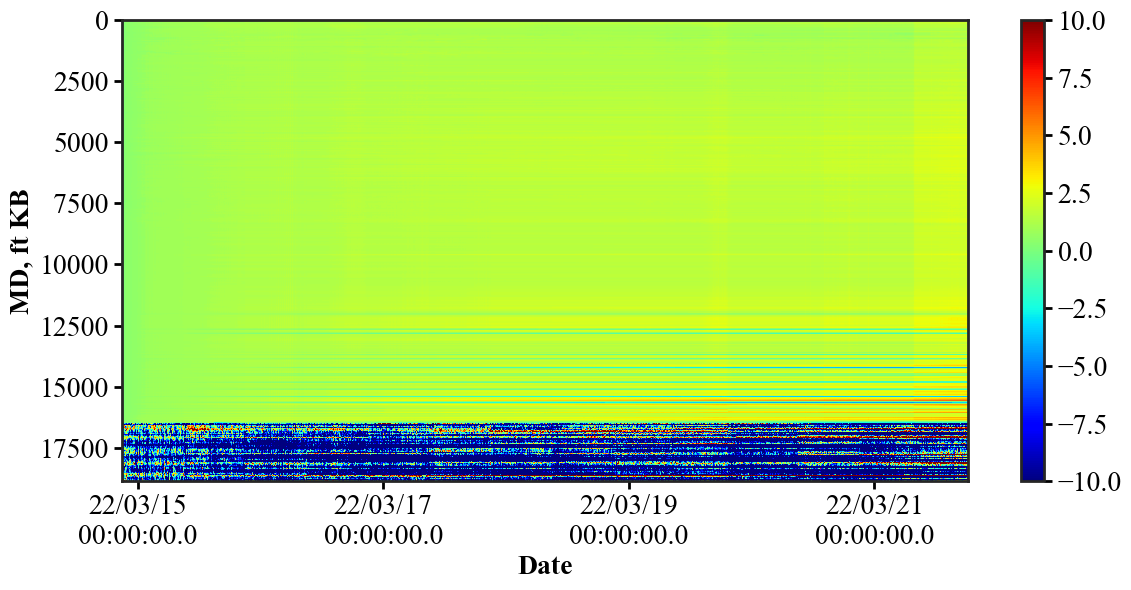

In [12]:
# cx = np.array([-1,1])
# DASdata.plot_waterfall(timescale='second',use_timestamp=True,timefmt = '%m/%d\n%H:%M:%S.{ms}')
DASdata.plot_waterfall(timescale='second',use_timestamp=True,cmap=plt.get_cmap('jet'))
ax = plt.gca()
plt.clim(-10,10)
plt.colorbar()
plt.ylabel("MD, ft KB")
plt.xlabel('Date')
plt.tight_layout()
# plt.yticks([0, 10000, 20000], [dep[0],dep[10000-1],dep[20000-1]])
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %H %M"))
plt.savefig('waterfall_ori.svg')


# Strain change v.s. Time at certain depths

In [ ]:
start_MD = 30000 # Fiber range : 12000ft
end_MD = 53000 # Fiber range

chosenMD = (np.arange(5)-2)+(22173 + start_MD) #index
eltsMD = depth[:end_MD][chosenMD] 

In [ ]:
np.where(depth[0:-1] > 12000)[0]

array([36391, 36392, 36393, ..., 57214, 57215, 57216], dtype=int64)

In [18]:
# Tricks of date plot
startDate = datetime.datetime(2022,1,4,20,46,10)
tdelta = np.ones(len(date_plot))*145 # 145 is the time interval

t_date = []
t_date.append(startDate)

for i in range(1,len(tdelta)):
    t_date.append(t_date[i-1] + datetime.timedelta(seconds = tdelta[i]))


<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\fengxiang.mao\AppData\Local\Temp\ipykernel_13684\438881642.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Strain Change, $\mu\epsilon$',fontweight = 'bold',fontsize=20)


<Figure size 640x480 with 0 Axes>

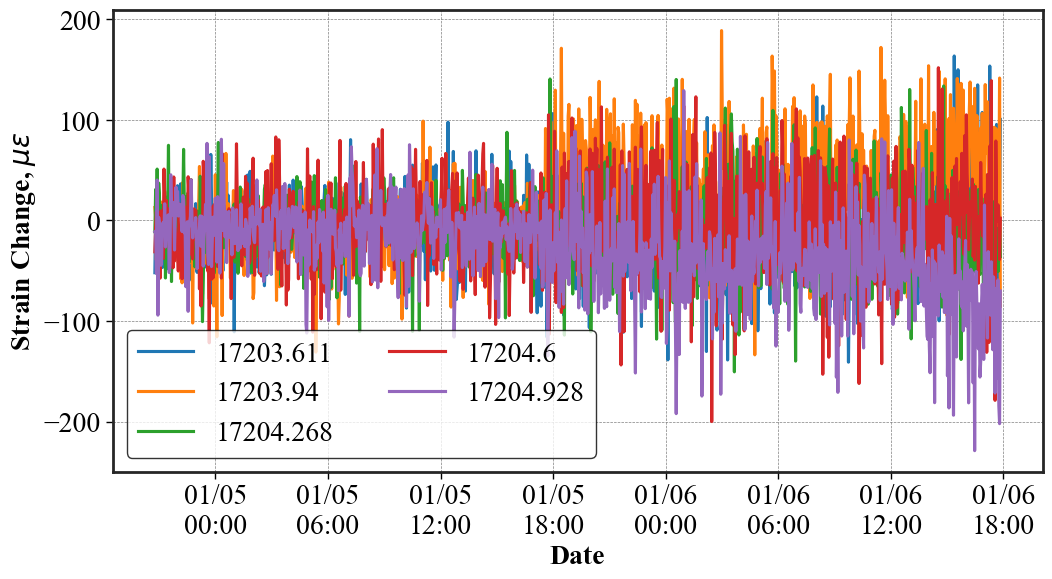

In [19]:
plt.figure()
fig, ax = plt.subplots(figsize = (12,6))
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(width=1, length=5)

for i in range(len(chosenMD)):
    plt.plot(t_date[:1120], dstrain[:1120,chosenMD[i]], linewidth = 2.25,label = eltsMD[i] )
    plt.xlabel("Date", fontweight = 'bold', fontsize=20)
    plt.ylabel('Strain Change, $\mu\epsilon$',fontweight = 'bold',fontsize=20)
    plt.legend(loc='best',ncol = 2,
               fontsize = 20, edgecolor = 'black')
# plt.plot(t_date[:1120],dstrain[:1120,52173])
plt.tick_params(axis='both', which='minor', labelsize=20)
ax.grid(color='gray', linestyle='--', linewidth = 0.5)
plt.tick_params(axis='both', which='major', labelsize=20, direction='out',
                top=False, right=False)
ax = plt.gca()
ax.xaxis_date()
date_format = mdates.DateFormatter('%m/%d\n%H:%M')
ax.xaxis.set_major_formatter(date_format)
# ax.tick_params(axis='x',labelrotation=45)
# plt.savefig(f'ori_chan{chosenMD[0]}.svg')